In [73]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from skimage.metrics import structural_similarity as ssim
import lpips
import torch

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
img = Image.open('nature.jpg')

In [10]:
cv2_img = cv2.imread('nature.jpg')
cv2_img = cv2.cvtColor(cv2_img,cv2.COLOR_BGR2RGB)

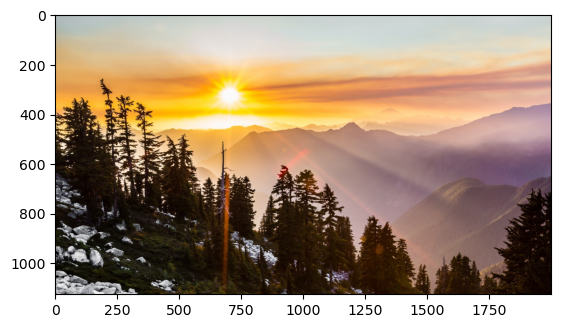

In [3]:
plt.imshow(img)

In [4]:
img.size

(2000, 1125)

In [5]:
random.seed(42)

In [89]:
def noise(intensity,img):
    noise = np.random.normal(0,intensity,size=(1125,2000,3))
    noise_img = img+noise
    noise_img = np.clip(noise_img, 0, 255)
    return noise_img.astype(np.uint8)

In [88]:
noise_img[0][0]

array([[169.4396917 , 181.43979421, 195.48617045],
       [172.03947511, 183.08674582, 192.85669772],
       [182.5110943 , 173.65356219, 153.23320924],
       ...,
       [210.3375822 , 193.17375723, 205.43701113],
       [197.77058473, 205.13232321, 202.74339152],
       [205.41443427, 188.85733662, 222.13920792]])

In [7]:
intensities = [10,20,900]

In [90]:
noise_img = []
for i in intensities:
    noise_img+=[noise(i,img)]

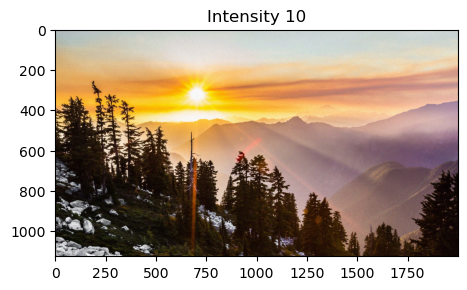

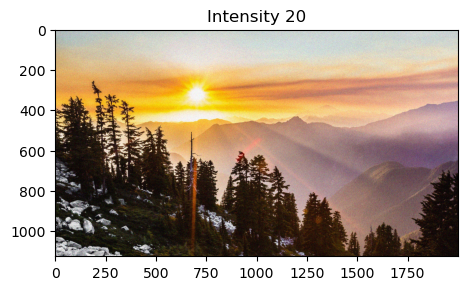

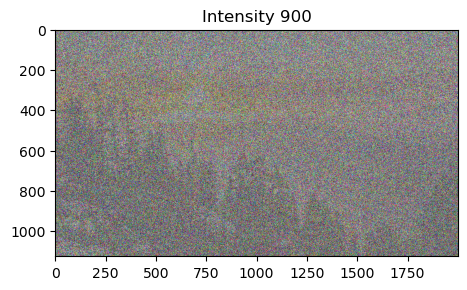

In [117]:
j=0
for i in noise_img:
    plt.figure(figsize=(10,10))
    plt.subplot(3, 1,j+1)
    plt.title("Intensity "+str(intensities[j]))
    plt.imshow(i)
    j=j+1
    

### Gaussian Blur

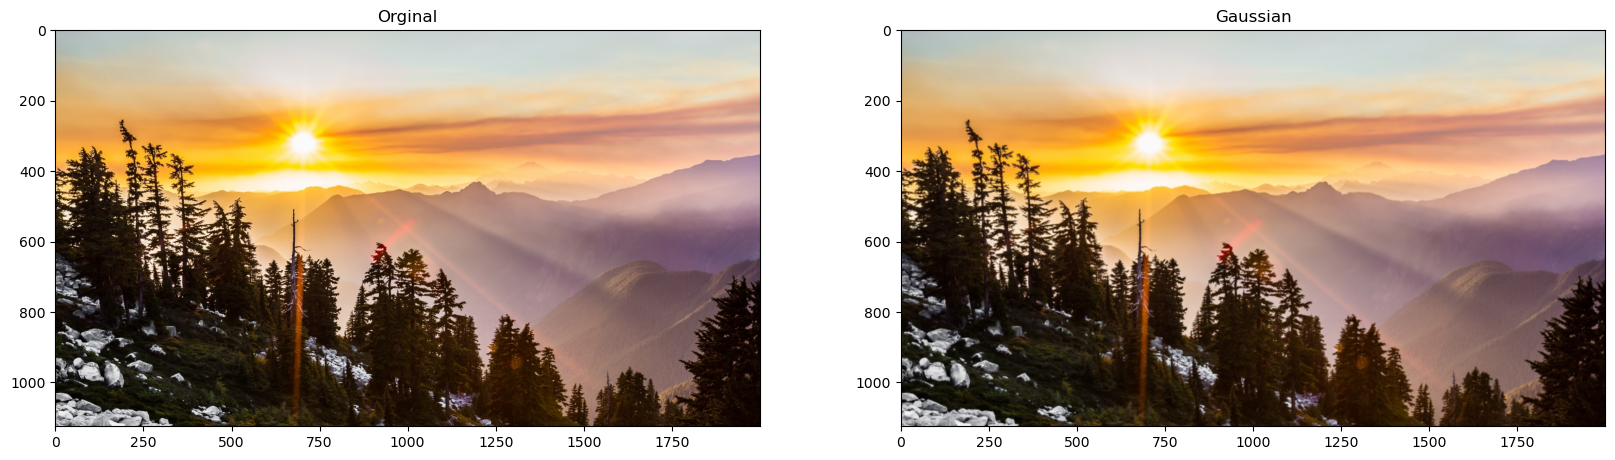

In [100]:
plt.figure(figsize=(20,20))
gaussian_blur = cv2.GaussianBlur(cv2_img,(5, 5), 0)
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(cv2_img)
plt.subplot(2,2,2)
plt.title("Gaussian")
plt.imshow(gaussian_blur)

### Motion Blur

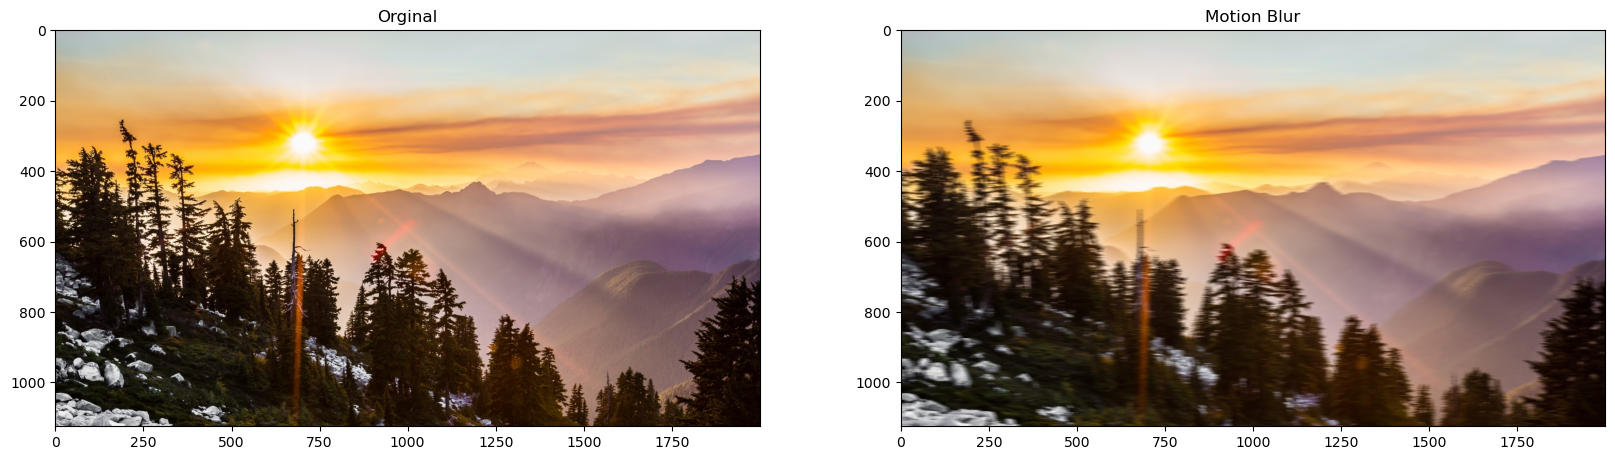

In [101]:
plt.figure(figsize=(20,20))
kernel_size = 20
fiter = np.zeros((kernel_size,kernel_size))
fiter[int((kernel_size-1)/2),:] = np.ones(kernel_size)
#normalization
fiter = fiter/kernel_size
motion_blur = cv2.filter2D(cv2_img,-1,fiter)
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(cv2_img)
plt.subplot(2,2,2)
plt.title("Motion Blur")
plt.imshow(motion_blur)

### Defocus Blur

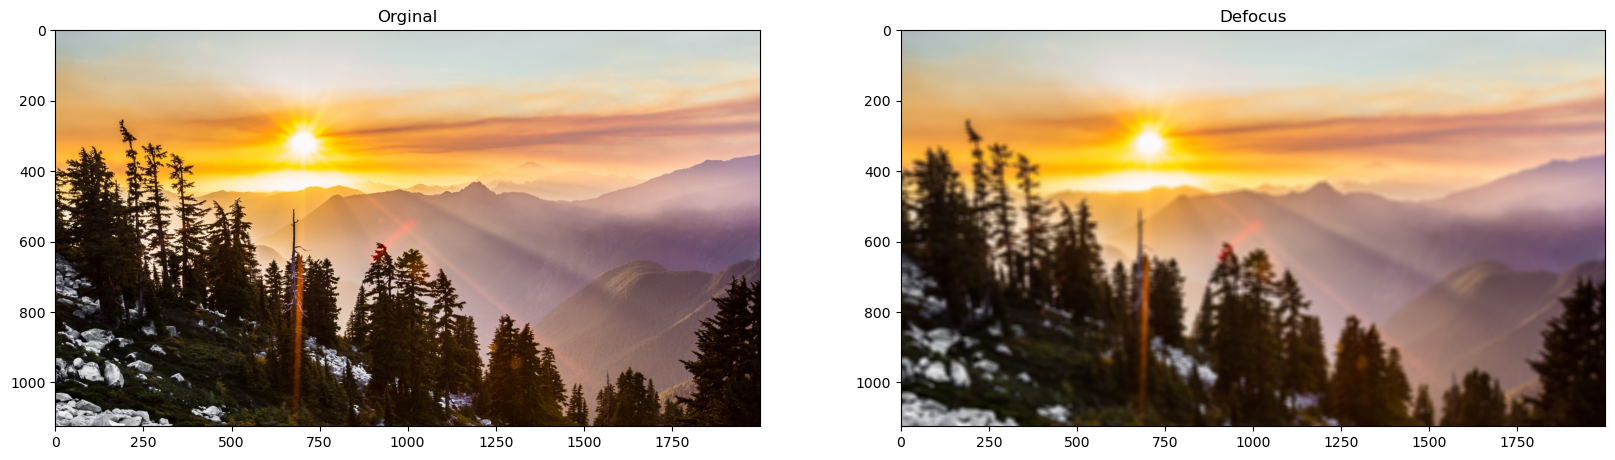

In [102]:
plt.figure(figsize=(20,20))
defocus_blur = cv2.GaussianBlur(cv2_img, (15, 15), 10)
plt.subplot(2,2,1)
plt.title("Orginal")
plt.imshow(cv2_img)
plt.subplot(2,2,2)
plt.title("Defocus")
plt.imshow(defocus_blur)

In [54]:
blur = {'Gaussian blur':gaussian_blur,'Motion blur':motion_blur,'Defocus Blur':defocus_blur}

$$\text{PSNR} = 10 \cdot \log_{10}\left(\frac{{\text{MAX}^2}}{{\text{MSE}}}\right)$$

In [15]:
def PSNR(img1,img2):
    mse = np.mean((img1 - img2) ** 2)
    psnr = 10 * np.log10((255**2) / mse)
    return psnr

In [74]:
lpips = lpips.LPIPS(net='alex')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\edith\anaconda3\lib\site-packages\lpips\weights\v0.1\alex.pth


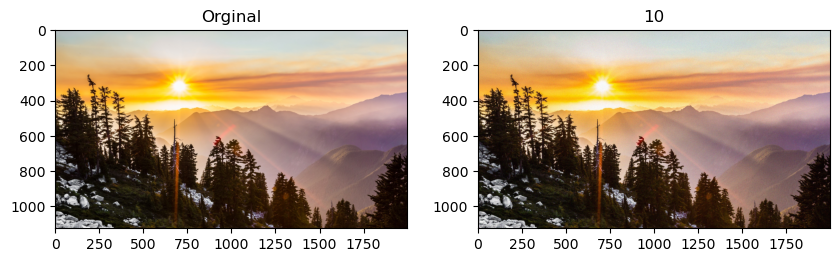

PSNR SCORE of Noise intensity 10  :  30.48847059408206
SSIM SCORE of Noise intensity 10  :  0.5399206692767876
LPIPS SCORE of Noise intensity 10  :  0.2687331
----------------------------------------------------


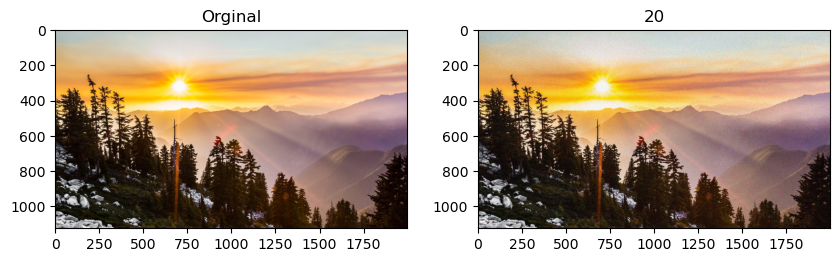

PSNR SCORE of Noise intensity 20  :  28.91652021426074
SSIM SCORE of Noise intensity 20  :  0.3015873531779412
LPIPS SCORE of Noise intensity 20  :  0.48244965
----------------------------------------------------


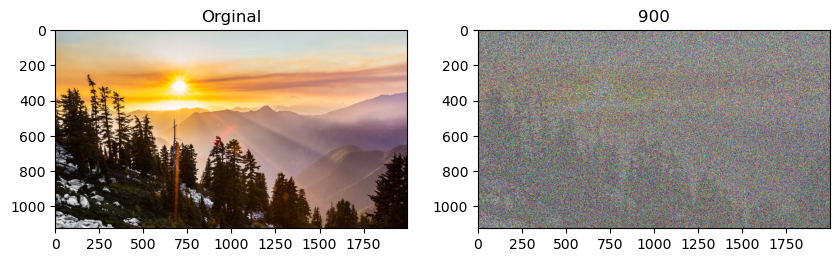

PSNR SCORE of Noise intensity 900  :  28.015352592942758
SSIM SCORE of Noise intensity 900  :  0.0072814866693806405
LPIPS SCORE of Noise intensity 900  :  1.3450849
----------------------------------------------------


In [114]:
for i,j in zip(noise_img,intensities):
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("Orginal")
    plt.imshow(cv2_img)
    plt.subplot(2,2,2)
    plt.title(j)
    plt.imshow(i)
    ssim_r = ssim(i[:, :, 0], cv2_img[:, :, 0], full=True)[0]
    ssim_g = ssim(i[:, :, 1], cv2_img[:, :, 1], full=True)[0]
    ssim_b = ssim(i[:, :, 2], cv2_img[:, :, 2], full=True)[0]
    plt.show()
    print("PSNR SCORE of Noise intensity",j," : ",PSNR(i,cv2_img))
    print("SSIM SCORE of Noise intensity",j," : ",(ssim_r+ssim_g+ssim_r)/3)
    i     = torch.tensor(i.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
    image = torch.tensor(cv2_img.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
    print("LPIPS SCORE of Noise intensity",j," : ",lpips(i,image)[0][0][0][0].detach().numpy())
    print("----------------------------------------------------")
    

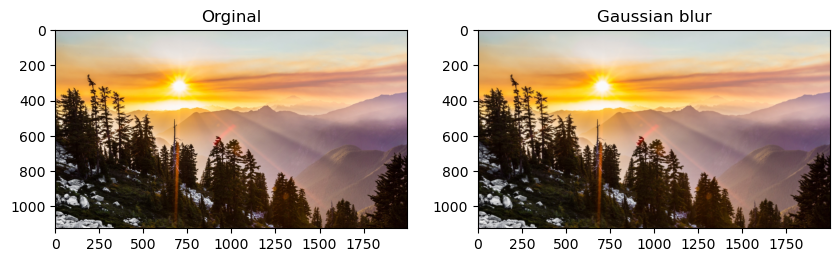

PSNR SCORE of  Gaussian blur  :  36.950792487417424
SSIM SCORE of  Gaussian blur  :  0.9476856549914096
LPIPS SCORE of  Gaussian blur  :  0.12940855
----------------------------------------------------


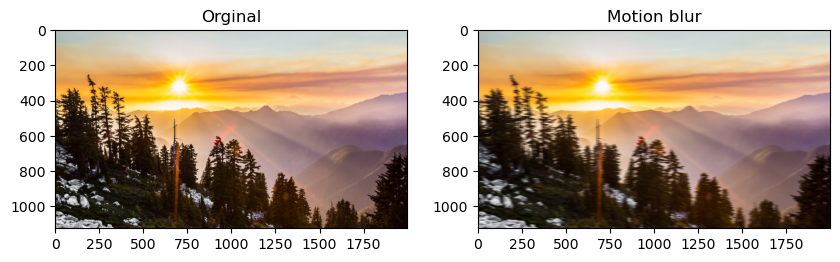

PSNR SCORE of  Motion blur  :  34.06799994620072
SSIM SCORE of  Motion blur  :  0.7983701280665717
LPIPS SCORE of  Motion blur  :  0.26022145
----------------------------------------------------


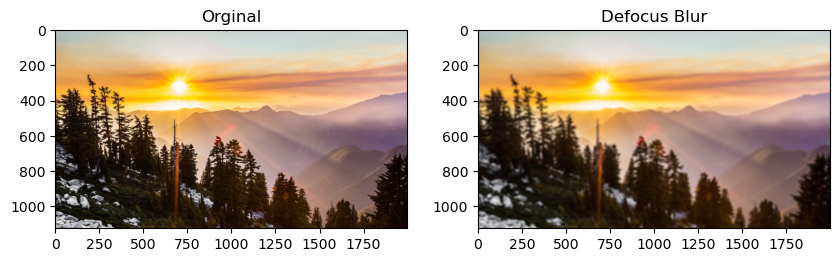

PSNR SCORE of  Defocus Blur  :  33.65607665068219
SSIM SCORE of  Defocus Blur  :  0.7762466956958854
LPIPS SCORE of  Defocus Blur  :  0.37192145
----------------------------------------------------


In [113]:
for j,i in blur.items():
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,1)
    plt.title("Orginal")
    plt.imshow(cv2_img)
    plt.subplot(2,2,2)
    plt.title(j)
    plt.imshow(i)
    plt.show()
    ssim_r = ssim(i[:, :, 0], cv2_img[:, :, 0], full=True)[0]
    ssim_g = ssim(i[:, :, 1], cv2_img[:, :, 1], full=True)[0]
    ssim_b = ssim(i[:, :, 2], cv2_img[:, :, 2], full=True)[0]
    
    print("PSNR SCORE of ",j," : ",PSNR(i,cv2_img))
    print("SSIM SCORE of ",j," : ",(ssim_r+ssim_g+ssim_r)/3)
    i     = torch.tensor(i.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
    image = torch.tensor(cv2_img.transpose((2, 0, 1)), dtype=torch.float32) / 255.0
    print("LPIPS SCORE of ",j," : ",lpips(i,image)[0][0][0][0].detach().numpy())
    print("----------------------------------------------------")